In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',#lets choose top 15
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '4527080c-13d5-4705-b15c-484d1928f63f',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
    #jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10 used this in anaconda cmd in order for our url to work

{'status': {'timestamp': '2024-11-29T06:51:51.090Z', 'error_code': 0, 'error_message': None, 'elapsed': 65, 'credit_count': 1, 'notice': None, 'total_count': 10232}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11811, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [3]:
type(data)

dict

In [3]:
import pandas as pd
pd.set_option('display.max_rows', None)

In [15]:
# #This normalizes the data and makes it all pretty in a dataframe

# # Assuming data['data'] is your JSON data  
# normalized_data = pd.json_normalize(data['data'])  

# # Save to CSV  
# normalized_data.to_csv(r'C:\Users\user\Documents\data analyst\projects\PYTHON\API\output.csv', index=False)

In [5]:
df=pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11811,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.978885e+07,1.978885e+07,...,57.1021,2.021653e+12,None,2024-11-29T06:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-29 08:52:08.750780
1,1027,Ethereum,ETH,ethereum,9598,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204380e+08,1.204380e+08,...,12.8863,4.299153e+11,None,2024-11-29T06:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-29 08:52:08.750780
2,825,Tether USDt,USDT,tether,105767,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.332051e+11,1.361944e+11,...,3.9921,1.362257e+11,None,2024-11-29T06:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-29 08:52:08.750780
3,5426,Solana,SOL,solana,798,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.748962e+08,5.891536e+08,...,3.4255,1.417770e+11,None,2024-11-29T06:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-29 08:52:08.750780
4,1839,BNB,BNB,bnb,2291,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440099e+08,1.440099e+08,...,2.8199,9.407673e+10,None,2024-11-29T06:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-29 08:52:08.750780
5,52,XRP,XRP,xrp,1445,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.705149e+10,9.998695e+10,...,2.7532,1.610617e+11,None,2024-11-29T06:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-29 08:52:08.750780
6,74,Dogecoin,DOGE,dogecoin,1112,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.469890e+11,1.469890e+11,...,1.7807,5.940695e+10,None,2024-11-29T06:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-29 08:52:08.750780
7,3408,USDC,USDC,usd-coin,23398,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.942682e+10,3.942682e+10,...,1.1819,3.943277e+10,None,2024-11-29T06:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-29 08:52:08.750780
8,2010,Cardano,ADA,cardano,1372,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.507378e+10,4.499485e+10,...,1.1048,4.729966e+10,None,2024-11-29T06:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-29 08:52:08.750780
9,5805,Avalanche,AVAX,avalanche,810,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",7.157487e+08,4.092690e+08,4.476053e+08,...,0.5294,3.088548e+10,None,2024-11-29T06:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-29 08:52:08.750780


In [59]:

def api_runner():
    
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',#lets choose top 15
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '4527080c-13d5-4705-b15c-484d1928f63f',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
        #jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10 used this in anaconda cmd in order for our url to work

    df = pd.json_normalize(data['data'])  
    df['timestamp'] = pd.to_datetime('now')  
    df 

    if not os.path.isfile(r'C:\Users\user\Documents\data analyst\projects\PYTHON\API\API.csv'):
        df.to_csv(r'C:\Users\user\Documents\data analyst\projects\PYTHON\API\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\user\Documents\data analyst\projects\PYTHON\API\API.csv', mode='a', header=False)

        

In [61]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('api runner completed')
    sleep(60) #sleep for a minute
exit()
    
    
    

{'status': {'timestamp': '2024-11-29T08:01:44.195Z', 'error_code': 0, 'error_message': None, 'elapsed': 35, 'credit_count': 1, 'notice': None, 'total_count': 10237}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11812, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

KeyboardInterrupt: 

In [70]:
df32=pd.read_csv(r'C:\Users\user\Documents\data analyst\projects\PYTHON\API\API.csv')
df32

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11812,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19788862.00000,...,56.98120,2008421317908.06006,NaN,2024-11-29T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-29 10:01:45.585913
1,1,1027,Ethereum,ETH,ethereum,9598,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120437986.49282,...,12.85130,426999351636.23999,NaN,2024-11-29T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-29 10:01:45.585913
2,2,825,Tether USDt,USDT,tether,105804,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,133432174476.26248,...,4.02040,136224351725.48000,NaN,2024-11-29T08:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-29 10:01:45.585913
3,3,5426,Solana,SOL,solana,798,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,474895704.23094,...,3.39930,140120337185.70001,NaN,2024-11-29T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-29 10:01:45.585913
4,4,1839,BNB,BNB,bnb,2291,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,144009915.92000,...,2.81730,93609619584.75000,NaN,2024-11-29T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-29 10:01:45.585913
5,5,52,XRP,XRP,xrp,1445,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,57051491087.00000,...,2.74220,159560226008.92001,NaN,2024-11-29T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-29 10:01:45.585913
6,6,74,Dogecoin,DOGE,dogecoin,1112,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,146989556383.70523,...,1.77360,58929574850.14000,NaN,2024-11-29T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-29 10:01:45.585913
7,7,3408,USDC,USDC,usd-coin,23401,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,39429405271.53257,...,1.18720,39430773643.89000,NaN,2024-11-29T08:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-29 10:01:45.585913
8,8,2010,Cardano,ADA,cardano,1372,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35073778164.29241,...,1.10910,47198903228.41000,NaN,2024-11-29T08:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-29 10:01:45.585913
9,9,5805,Avalanche,AVAX,avalanche,810,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",715748719.00000,409269069.65648,...,0.52660,30600457794.89000,NaN,2024-11-29T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-29 10:01:45.585913


In [66]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [68]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11812,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19788862.00000,19788862.00000,...,57.10220,2010023190618.62012,None,2024-11-29T08:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-29 10:03:56.287911
1,1027,Ethereum,ETH,ethereum,9598,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120437986.49282,120437986.49282,...,12.89850,427846547166.26001,None,2024-11-29T08:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-29 10:03:56.287911
2,825,Tether USDt,USDT,tether,105804,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,133432174476.26248,136194367953.82866,...,4.02000,136210588777.63000,None,2024-11-29T08:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-29 10:03:56.287911
3,5426,Solana,SOL,solana,798,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,474895704.23094,589153147.39609,...,3.40790,140237958614.45999,None,2024-11-29T08:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-29 10:03:56.287911
4,1839,BNB,BNB,bnb,2291,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144009915.92000,144009915.92000,...,2.82380,93666374128.92000,None,2024-11-29T08:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-29 10:03:56.287911
5,52,XRP,XRP,xrp,1445,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,57051491087.00000,99986947886.00000,...,2.74130,159506803537.60001,None,2024-11-29T08:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-29 10:03:56.287911
6,74,Dogecoin,DOGE,dogecoin,1112,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146989556383.70523,146989556383.70523,...,1.77810,58980242662.38000,None,2024-11-29T08:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-29 10:03:56.287911
7,3408,USDC,USDC,usd-coin,23401,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,39429405271.53257,39429405271.53257,...,1.18890,39431081868.80000,None,2024-11-29T08:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-29 10:03:56.287911
8,2010,Cardano,ADA,cardano,1372,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35073778164.29241,44994851307.90344,...,1.10900,47196708939.13000,None,2024-11-29T08:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-29 10:03:56.287911
9,5805,Avalanche,AVAX,avalanche,810,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",715748719.00000,409269069.65648,447605369.65648,...,0.52730,30587053412.44000,None,2024-11-29T08:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-29 10:03:56.287911


In [74]:
df3=df.groupby('name',sort=False)[['quote.USD.market_cap_dominance','quote.USD.fully_diluted_market_cap']].mean()
df3



,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap
name,,
Bitcoin,57.10220,2010023190618.62012
Ethereum,12.89850,427846547166.26001
Tether USDt,4.02000,136210588777.63000
Solana,3.40790,140237958614.45999
BNB,2.82380,93666374128.92000
XRP,2.74130,159506803537.60001
Dogecoin,1.77810,58980242662.38000
USDC,1.18890,39431081868.80000
Cardano,1.10900,47196708939.13000


In [80]:
df4=df3.stack()
df4

name                                           
Bitcoin      quote.USD.market_cap_dominance                  57.10220
             quote.USD.fully_diluted_market_cap   2010023190618.62012
Ethereum     quote.USD.market_cap_dominance                  12.89850
             quote.USD.fully_diluted_market_cap    427846547166.26001
Tether USDt  quote.USD.market_cap_dominance                   4.02000
             quote.USD.fully_diluted_market_cap    136210588777.63000
Solana       quote.USD.market_cap_dominance                   3.40790
             quote.USD.fully_diluted_market_cap    140237958614.45999
BNB          quote.USD.market_cap_dominance                   2.82380
             quote.USD.fully_diluted_market_cap     93666374128.92000
XRP          quote.USD.market_cap_dominance                   2.74130
             quote.USD.fully_diluted_market_cap    159506803537.60001
Dogecoin     quote.USD.market_cap_dominance                   1.77810
             quote.USD.fully_diluted_marke

In [82]:
type(df4)

pandas.core.series.Series

In [84]:
df5=df4.to_frame(name='values')
df5

values
name                                                              
Bitcoin     quote.USD.market_cap_dominance                57.10220
            quote.USD.fully_diluted_market_cap 2010023190618.62012
Ethereum    quote.USD.market_cap_dominance                12.89850
            quote.USD.fully_diluted_market_cap  427846547166.26001
Tether USDt quote.USD.market_cap_dominance                 4.02000
            quote.USD.fully_diluted_market_cap  136210588777.63000
Solana      quote.USD.market_cap_dominance                 3.40790
            quote.USD.fully_diluted_market_cap  140237958614.45999
BNB         quote.USD.market_cap_dominance                 2.82380
            quote.USD.fully_diluted_market_cap   93666374128.92000
XRP         quote.USD.market_cap_dominance                 2.74130
            quote.USD.fully_diluted_market_cap  159506803537.60001
Dogecoin    quote.USD.market_cap_dominance                 1.77810
            quote.USD.fully_diluted_market_cap   58980242662.38000
USDC        quote.USD.market_cap_dominance                 1.18890
            quote.USD.fully_diluted_market_cap   39431081868.80000
Cardano     quote.USD.market_cap_dominance                 1.10900
            quote.USD.fully_diluted_market_cap   47196708939.13000
Avalanche   quote.USD.market_cap_dominance                 0.52730
            quote.USD.fully_diluted_market_cap   30587053412.44000
TRON        quote.USD.market_cap_dominance                 0.52300
            quote.USD.fully_diluted_market_cap   17362251995.28000
Toncoin     quote.USD.market_cap_dominance                 0.48640
            quote.USD.fully_diluted_market_cap   32399520277.99000
Stellar     quote.USD.market_cap_dominance                 0.46240
            quote.USD.fully_diluted_market_cap   25524593773.74000
Shiba Inu   quote.USD.market_cap_dominance                 0.45350
            quote.USD.fully_diluted_market_cap   15050613250.37000
Polkadot    quote.USD.market_cap_dominance                 0.38880
            quote.USD.fully_diluted_market_cap   12906997419.42000

In [86]:
type(df5)

pandas.core.frame.DataFrame

In [88]:
df5.count()

values    30
dtype: int64

In [98]:
index = pd.Index(range(30))
df6=df5.reset_index()
df6


,name,level_1,values
0,Bitcoin,quote.USD.market_cap_dominance,57.10220
1,Bitcoin,quote.USD.fully_diluted_market_cap,2010023190618.62012
2,Ethereum,quote.USD.market_cap_dominance,12.89850
3,Ethereum,quote.USD.fully_diluted_market_cap,427846547166.26001
4,Tether USDt,quote.USD.market_cap_dominance,4.02000
5,Tether USDt,quote.USD.fully_diluted_market_cap,136210588777.63000
6,Solana,quote.USD.market_cap_dominance,3.40790
7,Solana,quote.USD.fully_diluted_market_cap,140237958614.45999
8,BNB,quote.USD.market_cap_dominance,2.82380
9,BNB,quote.USD.fully_diluted_market_cap,93666374128.92000


In [116]:
df7=df6.rename(columns={'level_1': 'percentage_change'})
df7

,name,percentage_change,values
0,Bitcoin,quote.USD.market_cap_dominance,57.10220
1,Bitcoin,quote.USD.fully_diluted_market_cap,2010023190618.62012
2,Ethereum,quote.USD.market_cap_dominance,12.89850
3,Ethereum,quote.USD.fully_diluted_market_cap,427846547166.26001
4,Tether USDt,quote.USD.market_cap_dominance,4.02000
5,Tether USDt,quote.USD.fully_diluted_market_cap,136210588777.63000
6,Solana,quote.USD.market_cap_dominance,3.40790
7,Solana,quote.USD.fully_diluted_market_cap,140237958614.45999
8,BNB,quote.USD.market_cap_dominance,2.82380
9,BNB,quote.USD.fully_diluted_market_cap,93666374128.92000


In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

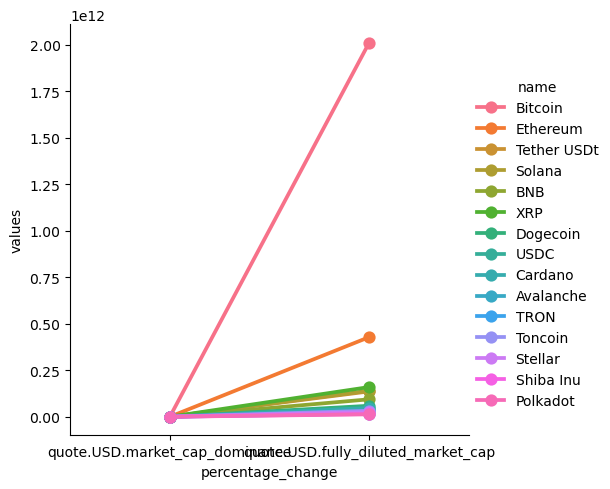

In [110]:
sns.catplot(x='percentage_change',y='values',hue='name',data=df7,kind='point')

<Axes: >

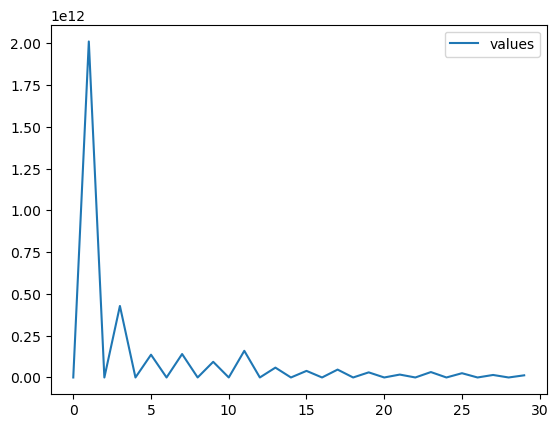

In [112]:
df7.plot()

In [120]:
#renaming in order our visualisation to look neat
df7['percentage_change']=df7['percentage_change'].replace(['quote.USD.market_cap_dominance','quote.USD.fully_diluted_market_cap'],['market_cap_dominance','diluted_market_cap'])
df7

,name,percentage_change,values
0,Bitcoin,market_cap_dominance,57.10220
1,Bitcoin,diluted_market_cap,2010023190618.62012
2,Ethereum,market_cap_dominance,12.89850
3,Ethereum,diluted_market_cap,427846547166.26001
4,Tether USDt,market_cap_dominance,4.02000
5,Tether USDt,diluted_market_cap,136210588777.63000
6,Solana,market_cap_dominance,3.40790
7,Solana,diluted_market_cap,140237958614.45999
8,BNB,market_cap_dominance,2.82380
9,BNB,diluted_market_cap,93666374128.92000


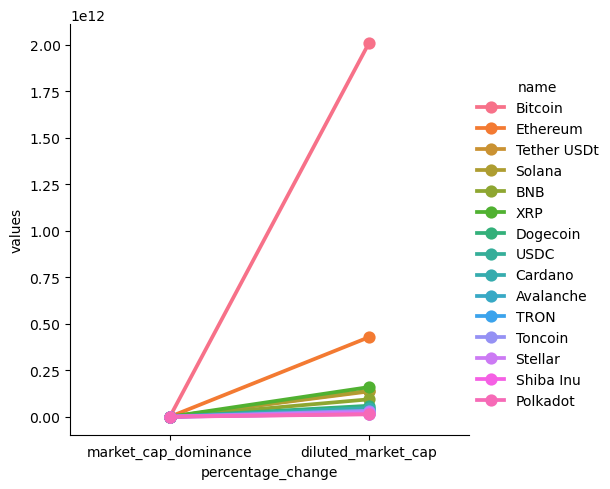

In [122]:
sns.catplot(x='percentage_change',y='values',hue='name',data=df7,kind='point')